In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import statistics as st
from datetime import datetime

In [3]:
model_path = "/home/aevans/nwp_bias/src/machine_learning/data/fh06/BKLN_loss_0.13463900983333588_ml_output_BKLN.parquet"

In [4]:
df = pd.read_parquet(model_path)
df = df.sort_index()

In [5]:
df

,target_error_lead_0,Model forecast,diff
0,0.606115,0.313182,0.292933
1,0.182093,0.166343,0.015750
2,0.158997,0.157695,0.001302
3,0.289400,0.189457,0.099943
4,0.418607,0.191541,0.227066
...,...,...,...
45620,0.003847,0.192660,-0.188813
45621,0.033608,0.039611,-0.006004
45622,-0.055782,-0.184287,0.128504
45623,-0.257358,-0.319431,0.062072


In [6]:
full_df = pd.read_parquet(
    "/home/aevans/nwp_bias/src/machine_learning/data/fh06/01_12_2024_14:10:44_full_BKLN.parquet"
)

In [7]:
full_df

,valid_time,valid_time_cos,valid_time_sin,target_error,t2m_BKLN,sh2_BKLN,d2m_BKLN,r2_BKLN,u10_BKLN,v10_BKLN,...,td_WANT,relh_WANT,srad_WANT,pres_WANT,mslp_WANT,wspd_sonic_WANT,wmax_sonic_WANT,wdir_sonic_WANT,precip_total_WANT,snow_depth_WANT
0,2018-01-24 21:00:00,0.916317,0.400454,0.284092,3.139246,0.00292,-3.366797,62.900002,3.564390,-1.335594,...,-7.561462,46.227291,144.841599,1015.013977,1015.366760,5.823098,10.870180,299.423706,0.0,-0.000513
1,2018-01-24 22:00:00,0.916317,0.400454,-0.518774,1.882349,0.00285,-3.678503,66.199997,2.432932,-1.707724,...,-7.831055,48.972900,7.672491,1015.768005,1016.125854,6.741258,9.383321,298.807587,0.0,-0.001099
2,2018-01-24 23:00:00,0.916317,0.400454,-0.562506,0.839441,0.00271,-4.360754,67.699997,1.912872,-1.545051,...,-8.249390,49.420849,0.053420,1016.577026,1016.937805,4.882998,9.686705,306.344788,0.0,0.000236
3,2018-01-25 00:00:00,0.909308,0.416125,-0.315593,0.416437,0.00255,-5.128546,65.800003,2.244408,-1.342674,...,-8.435425,51.059029,0.048821,1017.205994,1017.570007,3.885044,5.923674,315.039307,0.0,-0.000129
4,2018-01-25 01:00:00,0.909308,0.416125,-0.070947,0.198663,0.00256,-5.097968,66.900002,1.966018,-1.438853,...,-9.384308,50.274460,0.049275,1017.703003,1018.071167,5.875795,9.352589,315.367401,0.0,-0.000849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45620,2023-12-31 19:00:00,0.999853,-0.017166,-0.856275,5.061182,0.00379,0.162286,69.500000,2.175125,0.048166,...,-4.241974,49.200230,75.280914,1013.091980,1013.431946,3.900562,6.314405,286.215515,0.0,0.002675
45621,2023-12-31 20:00:00,0.999853,-0.017166,-0.799924,5.215143,0.00407,1.133508,73.400002,1.361091,-0.668808,...,-3.923218,50.314991,39.216293,1013.296021,1013.635681,3.616731,5.966516,277.852509,0.0,0.002588
45622,2023-12-31 21:00:00,0.999853,-0.017166,-0.969180,4.948083,0.00427,1.787286,78.099998,1.531729,0.139006,...,-3.674072,52.274220,13.258354,1013.697021,1014.038452,3.141523,5.426256,265.199493,0.0,0.002699
45623,2023-12-31 22:00:00,0.999853,-0.017166,-1.350855,4.718317,0.00427,1.787286,78.900002,0.664722,0.261378,...,-3.788818,51.722031,0.000000,1014.094971,1014.436035,2.120498,3.511304,277.338287,0.0,0.001573


In [8]:
df["valid_time"] = full_df["valid_time"]

In [9]:
df

,target_error_lead_0,Model forecast,diff,valid_time
0,0.606115,0.313182,0.292933,2018-01-24 21:00:00
1,0.182093,0.166343,0.015750,2018-01-24 22:00:00
2,0.158997,0.157695,0.001302,2018-01-24 23:00:00
3,0.289400,0.189457,0.099943,2018-01-25 00:00:00
4,0.418607,0.191541,0.227066,2018-01-25 01:00:00
...,...,...,...,...
45620,0.003847,0.192660,-0.188813,2023-12-31 19:00:00
45621,0.033608,0.039611,-0.006004,2023-12-31 20:00:00
45622,-0.055782,-0.184287,0.128504,2023-12-31 21:00:00
45623,-0.257358,-0.319431,0.062072,2023-12-31 22:00:00


In [10]:
# df = df[df['valid_time'] > datetime(2022, 7, 7, 0, 0, 0)]
# df = df[df['valid_time'] < datetime(2022, 8, 15, 0, 0, 0)]

In [11]:
df

,target_error_lead_0,Model forecast,diff,valid_time
0,0.606115,0.313182,0.292933,2018-01-24 21:00:00
1,0.182093,0.166343,0.015750,2018-01-24 22:00:00
2,0.158997,0.157695,0.001302,2018-01-24 23:00:00
3,0.289400,0.189457,0.099943,2018-01-25 00:00:00
4,0.418607,0.191541,0.227066,2018-01-25 01:00:00
...,...,...,...,...
45620,0.003847,0.192660,-0.188813,2023-12-31 19:00:00
45621,0.033608,0.039611,-0.006004,2023-12-31 20:00:00
45622,-0.055782,-0.184287,0.128504,2023-12-31 21:00:00
45623,-0.257358,-0.319431,0.062072,2023-12-31 22:00:00


In [12]:
mean_loss = st.mean(df["diff"])
print(f"Mean Loss is {mean_loss}")

Mean Loss is 0.07915463137610322


In [13]:
station = "BKLN"

In [14]:
def ml_output(df, fold, station):
    fig, ax = plt.subplots(figsize=(24, 6))
    x = df["valid_time"]
    plt.plot(x, df["target_error_lead_0"], c="r", linewidth=3, label="2MT Error: HRRR")
    plt.plot(x, df["Model forecast"], c="b", alpha=0.7, label="LSTM Output")
    # plt.axvline(
    #     x=(int(0.2 * len(x)) * fold),
    #     c="green",
    #     linestyle="--",
    #     linewidth=2.0,
    #     label="Test Set Start",
    # )
    # plt.axvline(
    #     x=(int(0.2 * len(x)) * (fold + 1)),
    #     c="red",
    #     linestyle="--",
    #     linewidth=2.0,
    #     label="Test Set Finish",
    # )
    ax.set_title(f"LSTM Output v Target: {station}: FH06", fontsize=28)
    plt.ylim(-4, 4.1)
    # ax.set_xticklabels([2018, 2019, 2020, 2021, 2022, 2023])
    # ax.set_xticks(
    #     np.arange(
    #         0, (len(x) + 1), ((len(x) + 1) / 6)
    #     )
    # )
    ax.legend()

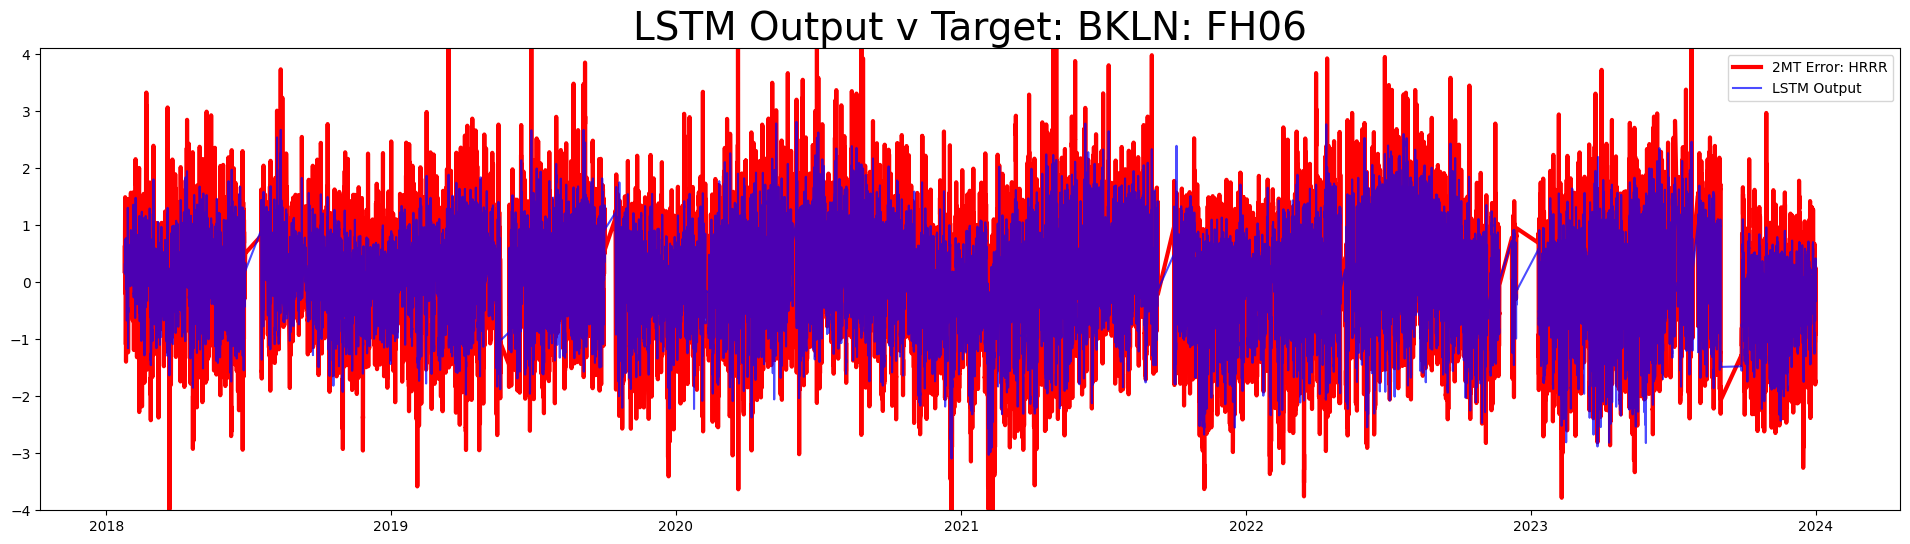

In [15]:
ml_output(df, 4, station)

In [16]:
full_df["Abs_err"] = df["diff"]

In [17]:
for k in full_df.columns:
    if re.search(
        f"{station}|valid|Model forecast|Abs_err",
        k,
    ):
        continue
    else:
        full_df = full_df.drop(columns=[k])

In [18]:
# test_len = int(len(full_df['valid_time'])*0.2)
# full_df = full_df.iloc[0:test_len]

In [20]:
def groupby_month(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.month), (df.valid_time.dt.year)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    x = np.arange(1, len(the_list) + 1)
    plt.bar(x, the_list)
    ax.set_xticklabels([2018, 2019, 2020, 2021, 2022, 2023])
    ax.set_xticks(np.arange(1, len(the_list) + 1, int((len(the_list) + 1) / 6)))
    return the_list

/tmp/tmp.xsUOPJIEcn/ipykernel_2111/2351311710.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022, 2023])


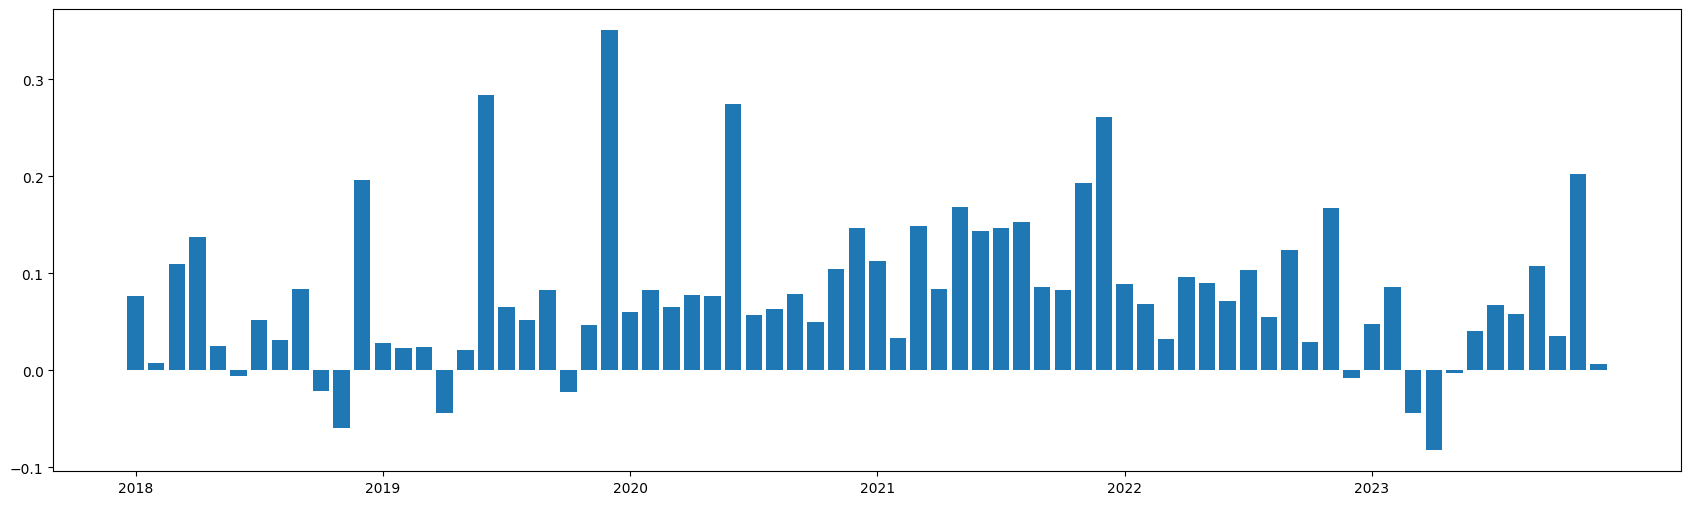

In [21]:
err_by_month = groupby_month(full_df, "Abs_err")

In [63]:
def groupby_time(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.hour)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    x = np.arange(0, len(the_list))
    plt.bar(x, the_list, color="g")
    return the_list

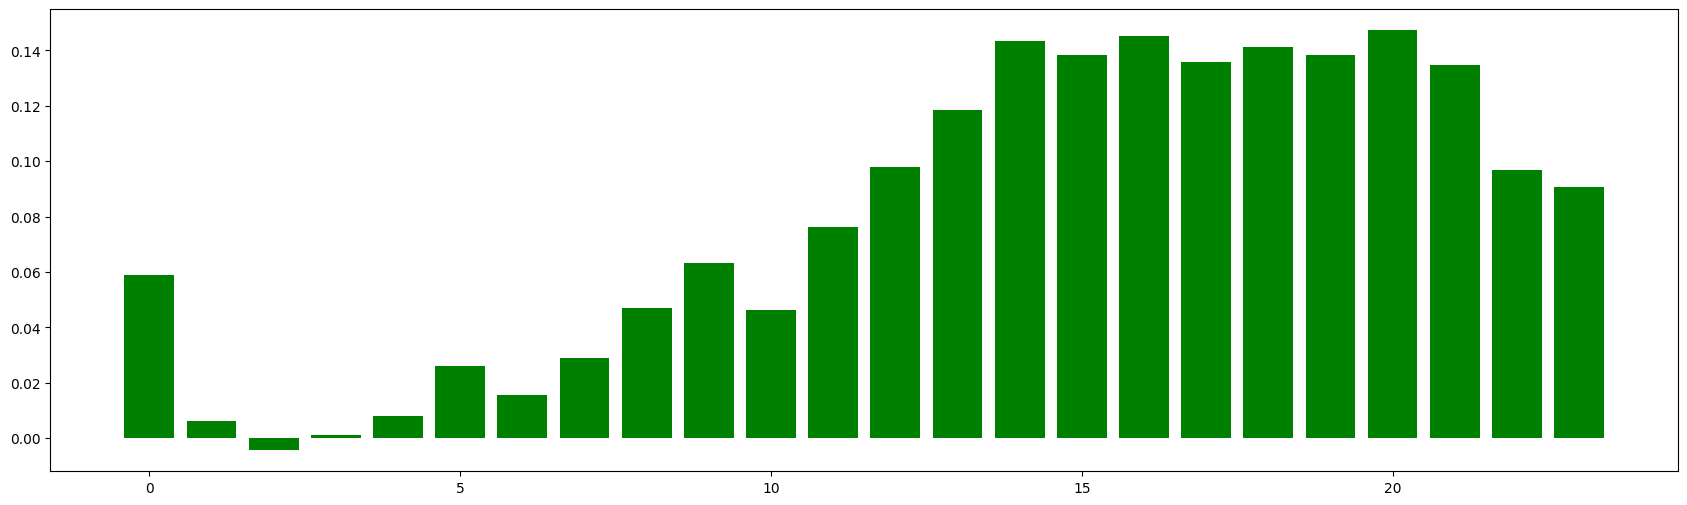

In [64]:
err_by_time = groupby_time(full_df, "Abs_err")

In [65]:
def myround(x, base):
    return base * round(x / base)

In [66]:
# function to get unique values
def unique(list1):
    # initialize a null list
    unique_list = []

    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [67]:
def err_bucket(full_df, met_col, rounded_base):
    temps = []
    for i, _ in enumerate(full_df[met_col]):
        rounded = myround(full_df[met_col].iloc[i], rounded_base)
        temps.append(rounded)

    unique_temps = unique(temps)

    zeros = np.zeros(len(unique_temps))
    rs = np.resize(zeros, (len(unique_temps), len(unique_temps)))

    temp_df = pd.DataFrame(
        data=rs, index=[np.arange(len(unique_temps))], columns=sorted(unique_temps)
    )

    for i, _ in enumerate(full_df[met_col]):
        rounded = myround(full_df[met_col].iloc[i], rounded_base)
        err = full_df["Abs_err"].iloc[i]
        temp_df[rounded].iloc[0] = abs(err) + abs(temp_df[rounded].iloc[0])
        temp_df[rounded].iloc[-1] += 1

    instances = temp_df.iloc[-1]
    temp_df = temp_df.iloc[0]

    return temp_df, instances

In [68]:
def plot_buckets(temp_df, instances, var_name, cmap, width):
    my_cmap = plt.get_cmap(cmap)
    averages = temp_df / instances
    y = averages
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
    the_list = averages.tolist()
    fig, ax = plt.subplots(figsize=(21, 6), facecolor="slategrey", layout="compressed")
    bars = plt.bar(temp_df.keys(), the_list, color=my_cmap(rescale(y)), width=width)
    ax.set_title("Absolute Error of LSTM", fontsize=28, c="white")
    ax.set_xlabel(var_name, fontsize=18, c="white")
    ax.set_ylabel("Mean Absolute Error", fontsize=18, c="white")
    # Iterating over the bars one-by-one
    # Annotate each bar with its value
    # Annotate each bar with the number of instances
    for bar, value, instance_count in zip(bars, the_list, instances):
        yval = value + 0.01  # Adjust the vertical position of the label
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            f"n={instance_count}",
            ha="center",
            va="bottom",
            color="black",
            fontsize=12,
            rotation=90,
        )

In [69]:
for k in full_df.keys():
    print(k)

valid_time
valid_time_cos
valid_time_sin
t2m_BKLN
sh2_BKLN
d2m_BKLN
r2_BKLN
u10_BKLN
v10_BKLN
tp_BKLN
mslma_BKLN
orog_BKLN
tcc_BKLN
asnow_BKLN
cape_BKLN
dswrf_BKLN
dlwrf_BKLN
gh_BKLN
u_total_BKLN
u_dir_BKLN
new_tp_BKLN
lat_BKLN
lon_BKLN
elev_BKLN
tair_BKLN
ta9m_BKLN
td_BKLN
relh_BKLN
srad_BKLN
pres_BKLN
mslp_BKLN
wspd_sonic_BKLN
wmax_sonic_BKLN
wdir_sonic_BKLN
precip_total_BKLN
snow_depth_BKLN
Abs_err


In [70]:
# diector = sorted(os.listdir('/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20231129/'))

# for d in diector:
#         full_df = pd.read_parquet(
#         f"/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20231129/{d}"
#     )
#         for k in full_df.columns:
#             if re.search(
#                 f"{station}",
#                 k,
#             ):
#                 print("Succes!!")
#                 print(d)
#             else:
#                 continue

In [71]:
temp_df, instances = err_bucket(full_df, f"tair_{station}", 2)

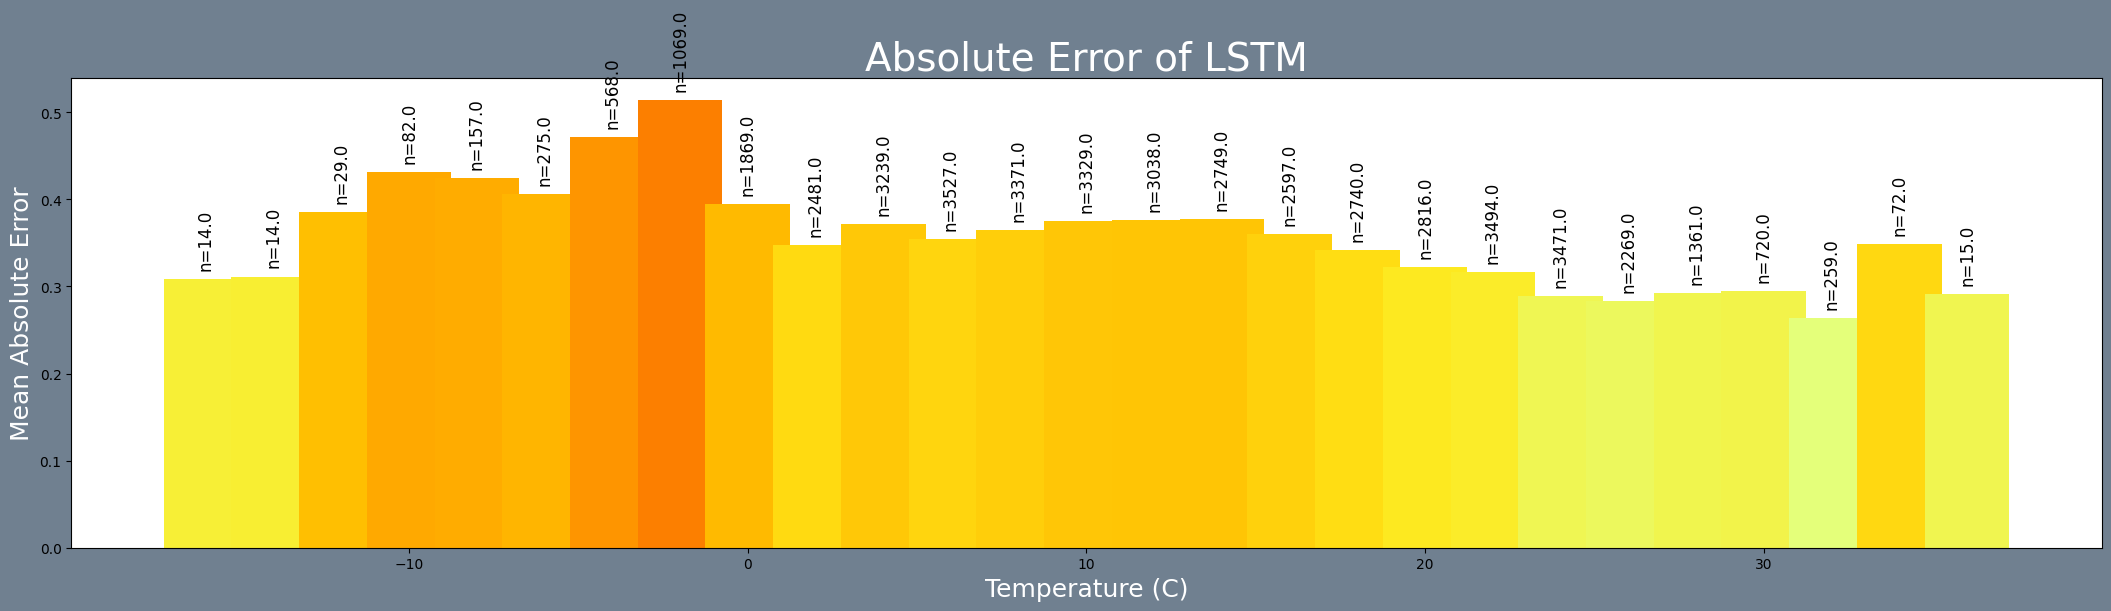

In [72]:
plot_buckets(temp_df, instances, "Temperature (C)", "Wistia", 2.5)

In [73]:
relh_df, instances = err_bucket(full_df, f"relh_{station}", 2)

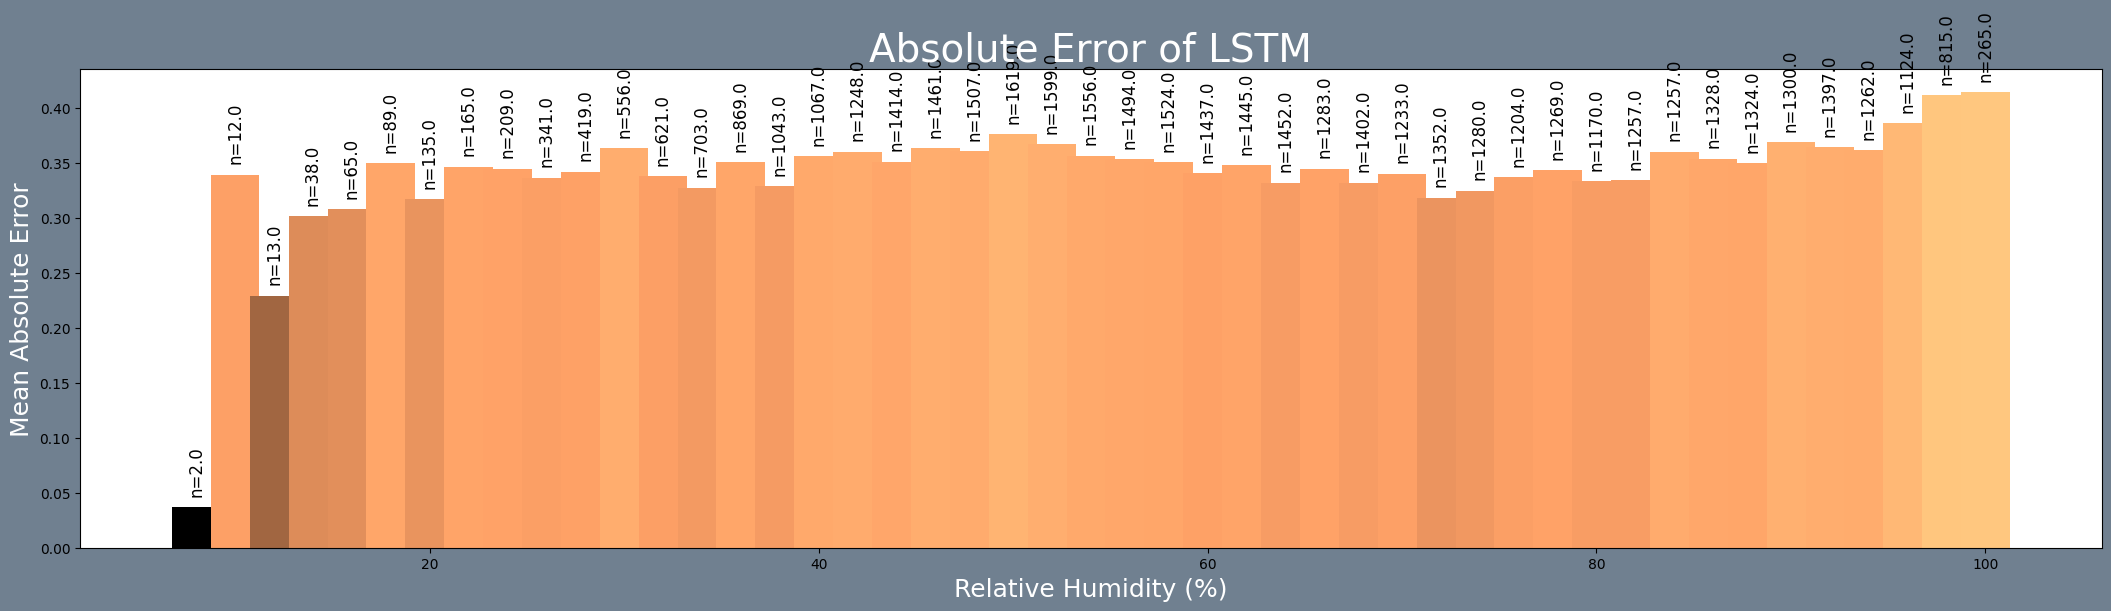

In [74]:
plot_buckets(relh_df, instances, "Relative Humidity (%)", "copper", 2.5)

In [75]:
new_df, instances = err_bucket(full_df, f"srad_{station}", 40)

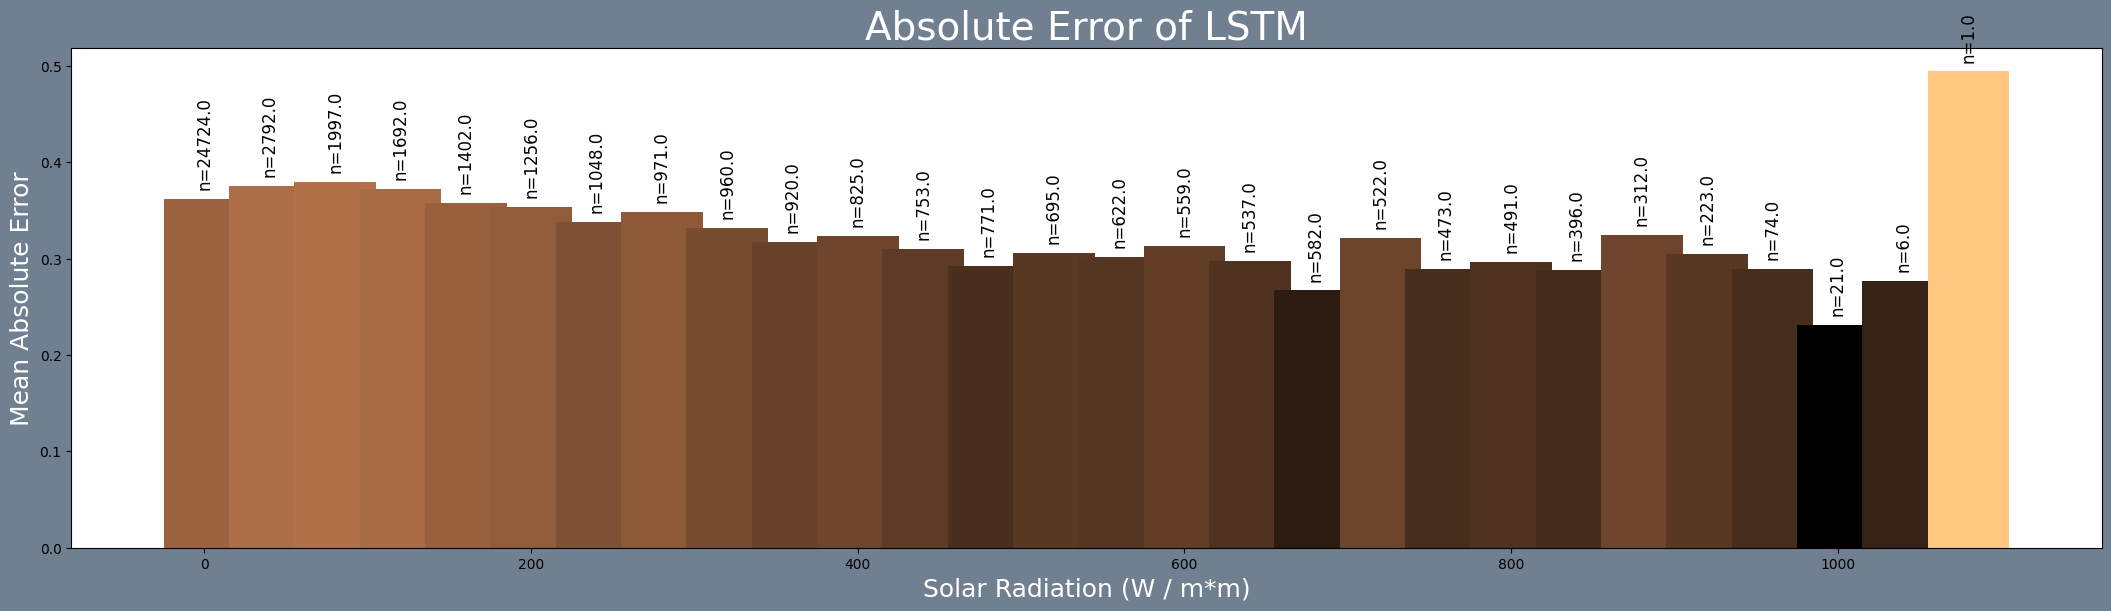

In [76]:
plot_buckets(new_df, instances, "Solar Radiation (W / m*m)", "copper", 50.0)

In [77]:
pres_df, instances = err_bucket(full_df, f"pres_{station}", 2)

In [78]:
full_df[f"pres_{station}"].mean()

1012.9971

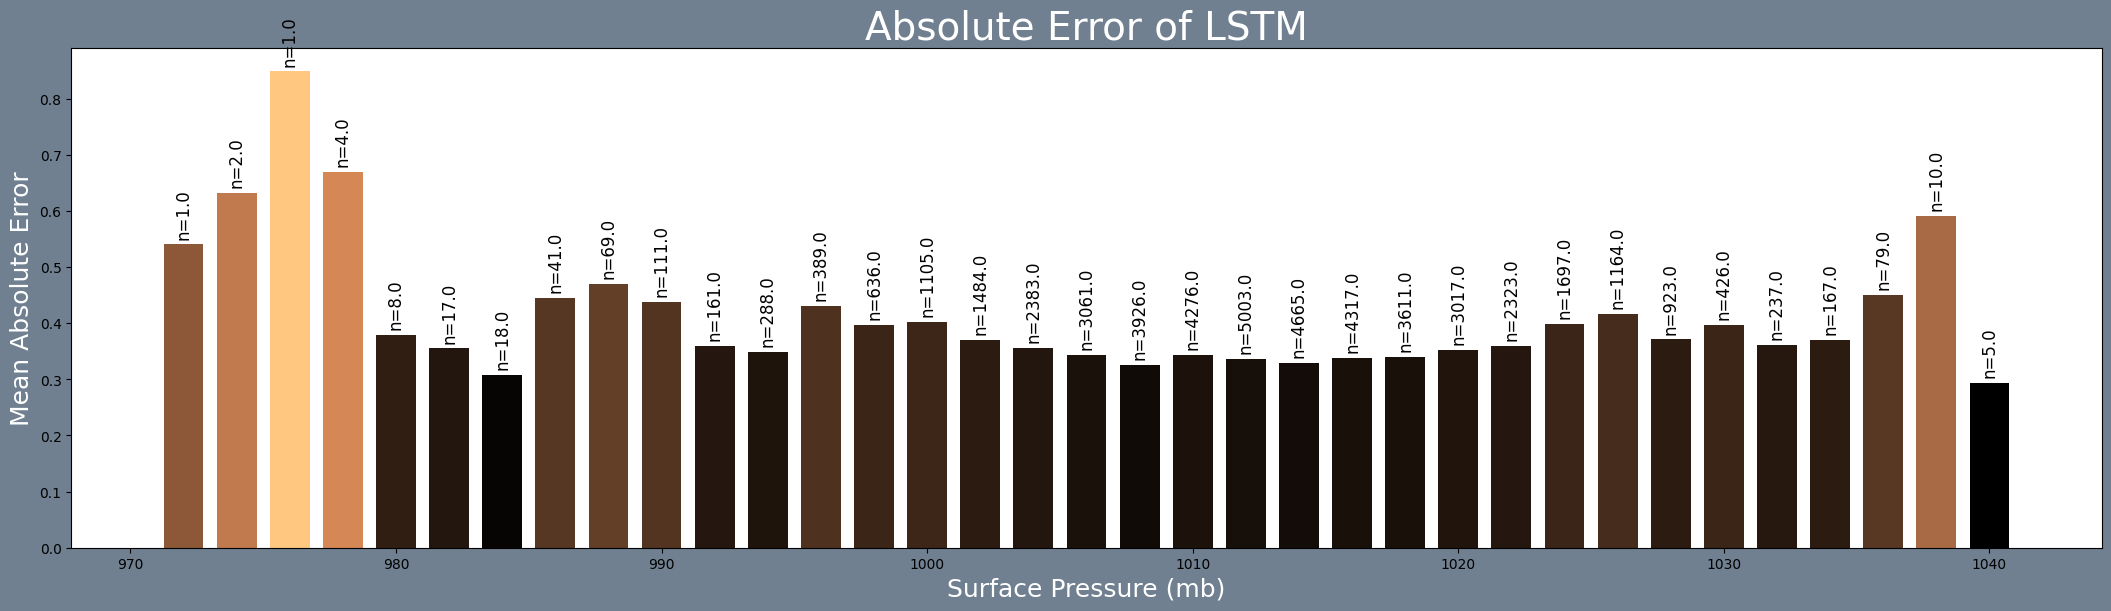

In [79]:
plot_buckets(pres_df, instances, "Surface Pressure (mb)", "copper", 1.5)

In [80]:
def round_small(full_df, met_col, rounded_base):
    temps = []
    for i, _ in enumerate(full_df[met_col]):
        if full_df[met_col].iloc[i] < 1.0 and full_df[met_col].iloc[i] >= 0:
            rounded = round(full_df[met_col].iloc[i], rounded_base)
            temps.append(rounded)
        else:
            rounded = myround(full_df[met_col].iloc[i], 1)
            temps.append(rounded)

    unique_temps = unique(temps)

    zeros = np.zeros(len(unique_temps))
    rs = np.resize(zeros, (len(unique_temps), len(unique_temps)))
    temp_df = pd.DataFrame(
        data=rs, index=[np.arange(len(unique_temps))], columns=sorted(unique_temps)
    )

    for i, _ in enumerate(full_df[met_col]):
        if full_df[met_col].iloc[i] < 1.0 and full_df[met_col].iloc[i] >= 0:
            rounded = round(full_df[met_col].iloc[i], rounded_base)
        else:
            rounded = float(myround(full_df[met_col].iloc[i], base=1))
        err = float(full_df["Abs_err"].iloc[i])
        temp_df[rounded].iloc[0] = abs(err) + abs(temp_df[rounded].iloc[0])
        temp_df[rounded].iloc[-1] += 1

    instances = temp_df.iloc[-1]
    temp_df = temp_df.iloc[0]
    temp_df = temp_df.loc[~(temp_df == 0)]
    instances = instances.loc[~(instances == 0)]
    return temp_df, instances

In [81]:
rain_df, instances = err_bucket(full_df, f"new_tp_{station}", 2)

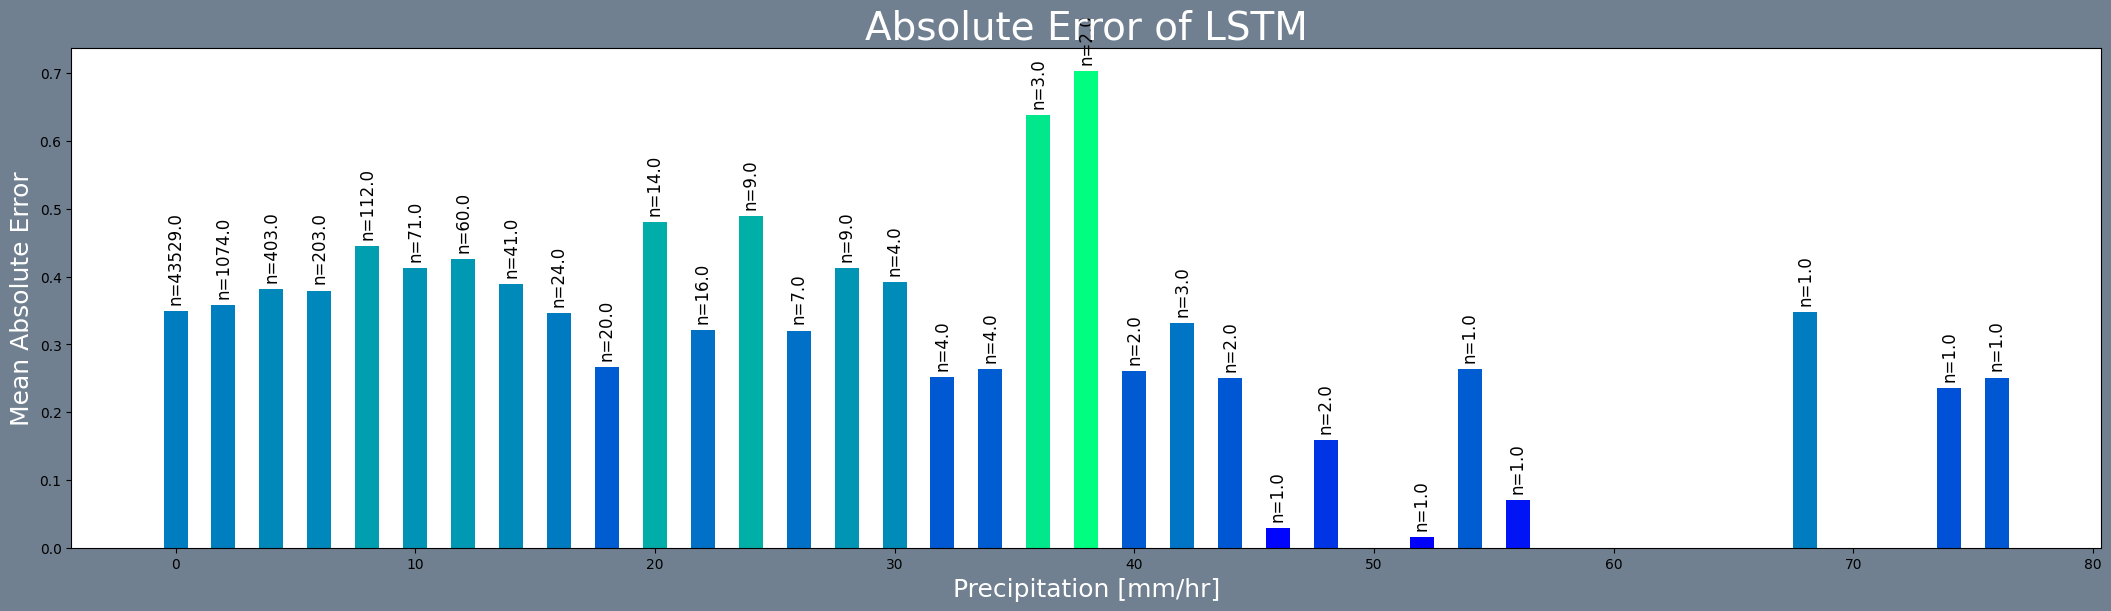

In [82]:
plot_buckets(rain_df, instances, "Precipitation [mm/hr]", "winter", 1.0)

In [83]:
snow_df, instances = round_small(full_df, f"snow_depth_{station}", 2)

In [84]:
snow_df = snow_df.iloc[1:]
instances = instances.iloc[1:]

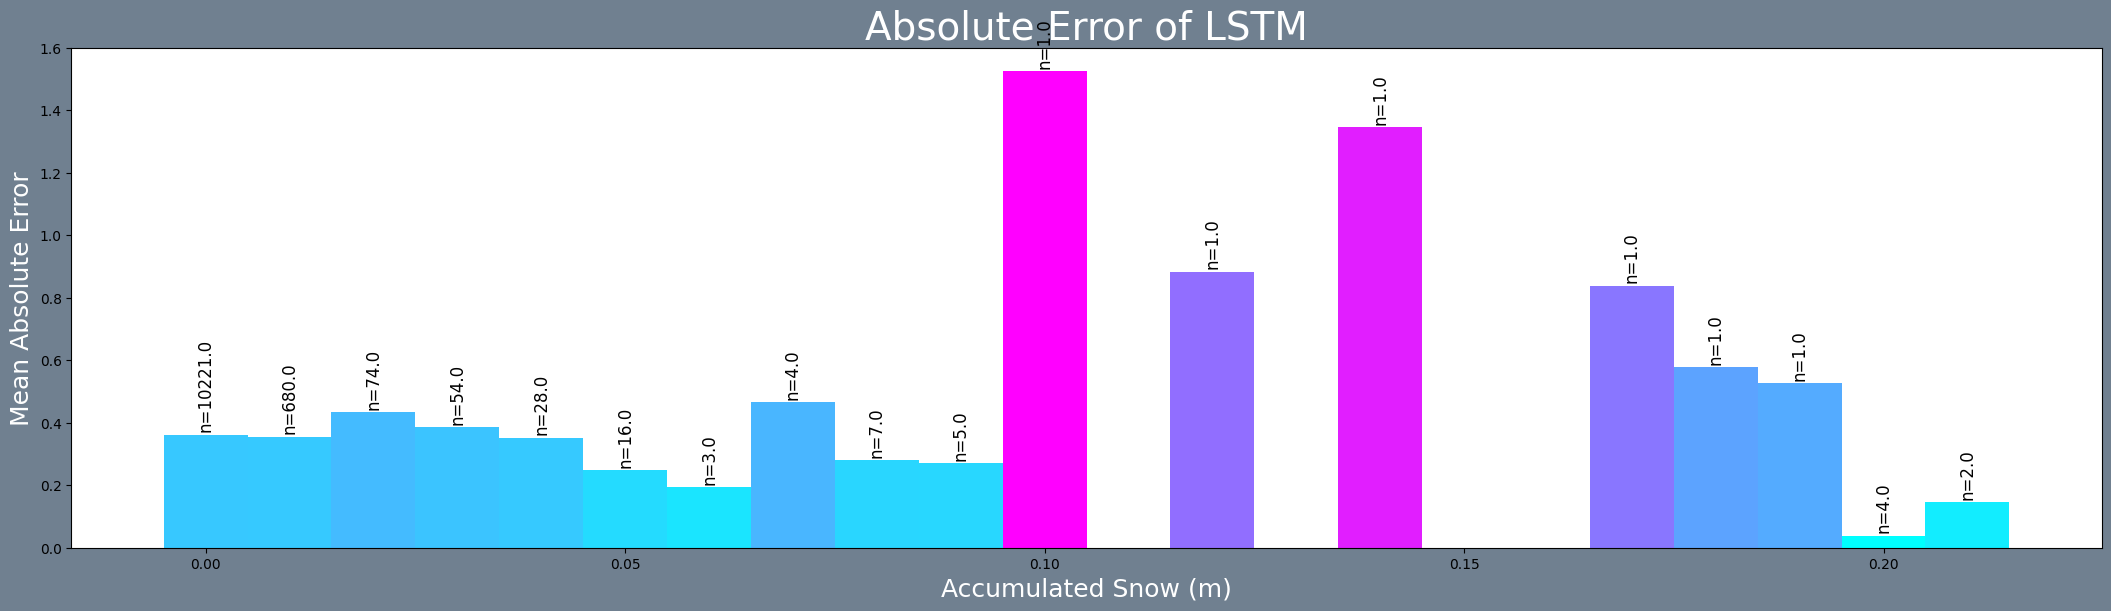

In [85]:
plot_buckets(snow_df, instances, "Accumulated Snow (m)", "cool", 0.01)

In [86]:
wmax, instances = err_bucket(full_df, f"wmax_sonic_{station}", 2)

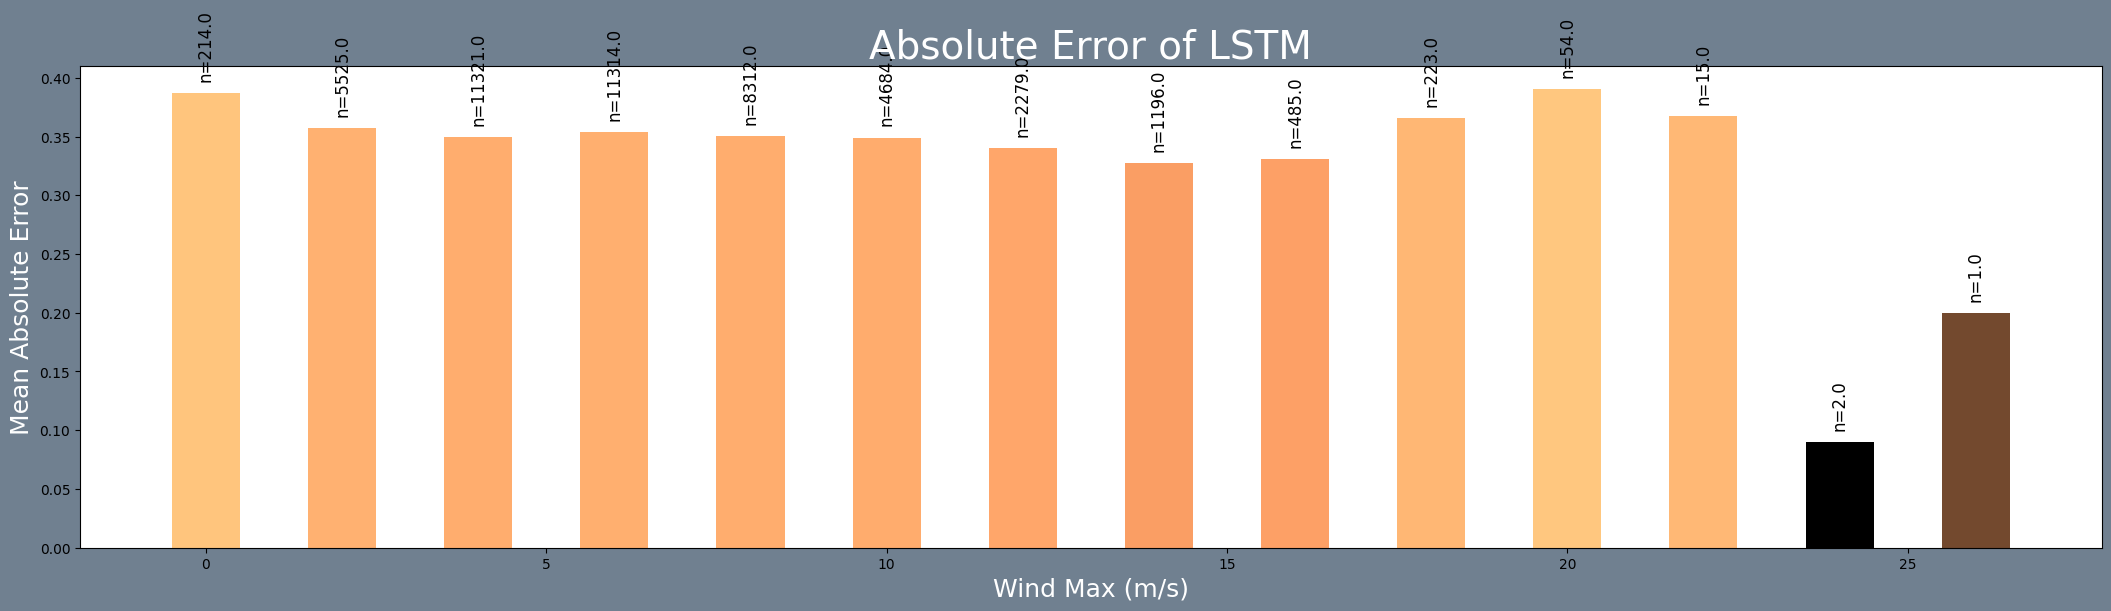

In [87]:
plot_buckets(wmax, instances, "Wind Max (m/s)", "copper", 1.0)